# Aprendizado Não-Supervisionado (Clustering)


## K-Means Clustering


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = pd.read_csv('store.csv')

In [11]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
data.set_index('CustomerID', inplace=True)

In [17]:
df = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [18]:
df

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


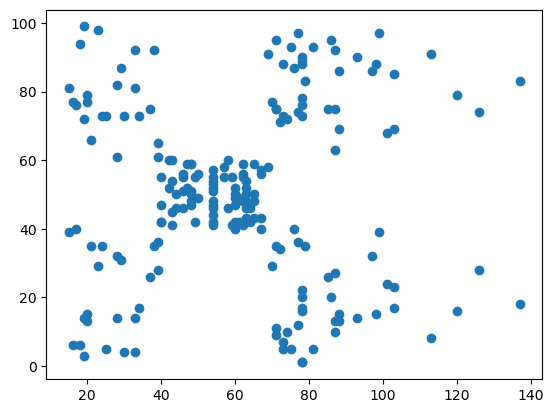

In [19]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()

# Identificar quantidade de Clusters

Método Elbow (Cotovelo)


In [21]:
from sklearn.cluster import KMeans

In [22]:
X = df.values

In [23]:
X.shape

(200, 2)

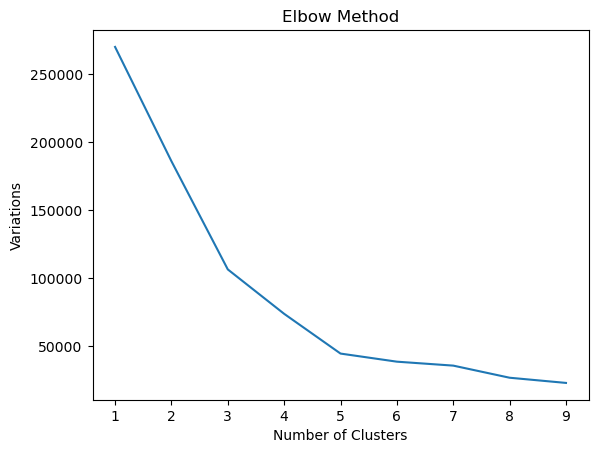

In [24]:
variations = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    variations.append(kmeans.inertia_)

plt.plot(range(1, 10), variations)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Variations')
plt.show()

In [25]:
kmeans_final = KMeans(n_clusters=5)

In [26]:
kmeans_final.fit(X)

KMeans(n_clusters=5)

In [27]:
cluster_pred = kmeans_final.predict(X)

In [28]:
cluster_pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [29]:
cluster_center = kmeans_final.cluster_centers_

In [30]:
cluster_center

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [31]:
X[cluster_pred == 0, 0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39])

In [32]:
X[cluster_pred == 1, 0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76])

In [33]:
X[cluster_pred == 2, 0]

array([ 69,  70,  71,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,
        78,  78,  78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,
        88,  88,  93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137])

In [34]:
X[cluster_pred == 3, 0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137])

In [35]:
X[cluster_pred == 4, 0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39])

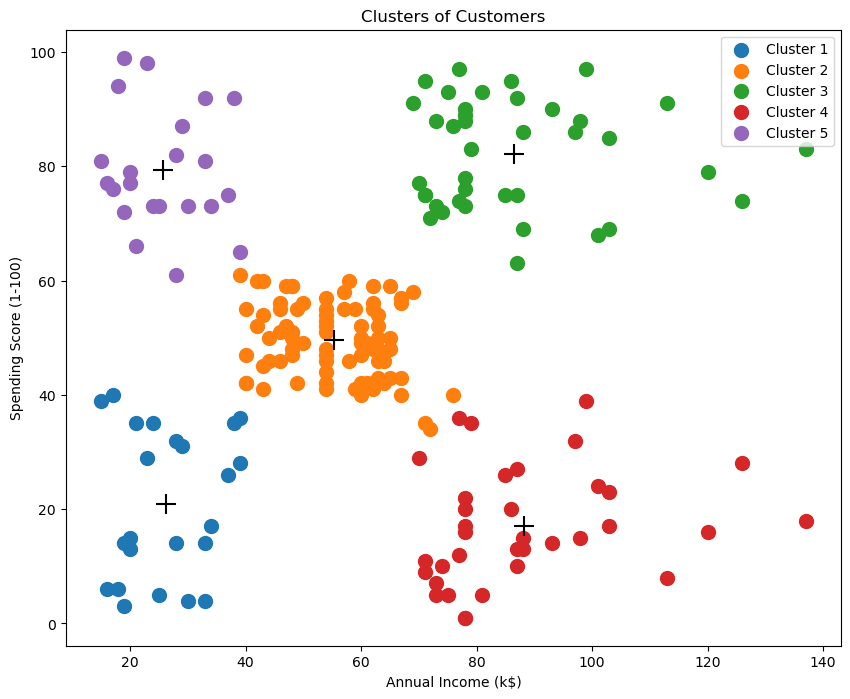

In [47]:
plt.figure(figsize=(10, 8))
plt.scatter(X[cluster_pred == 0, 0], X[cluster_pred == 0, 1],
            label="Cluster 1", s=100)
plt.scatter(X[cluster_pred == 1, 0], X[cluster_pred == 1, 1],
            label="Cluster 2", s=100)
plt.scatter(X[cluster_pred == 2, 0], X[cluster_pred == 2, 1],
            label="Cluster 3", s=100)
plt.scatter(X[cluster_pred == 3, 0], X[cluster_pred == 3, 1],
            label="Cluster 4", s=100)
plt.scatter(X[cluster_pred == 4, 0], X[cluster_pred == 4, 1],
            label="Cluster 5", s=100)
plt.scatter(cluster_center[:, 0], cluster_center[:,
            1], marker='+', s=200, c='black')
plt.legend()
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()